# Exploratory Data Analysis

### Aurthor: Ali Muhammad

#### Task:
#### ● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#### ● As a security/defense analyst, try to find out the hot zone of terrorism.
#### ● What all security issues and insights you can derive by EDA?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load the data

In [2]:
df = pd.read_csv(r'terrorism.xls',encoding = "ISO-8859-1",low_memory=False)
pd.set_option('display.max_columns', 100)


## Some statistics about the dataset

In [3]:
print(df.shape)

(181691, 135)


In [4]:
df.head()  #gives us top 5 rows of the dataframe

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,...,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# Cleaning

In [7]:
col={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type'}

df.rename(columns=col,inplace=True)

In [8]:
df=df[['Year','Month','Day','Country','state','Region','city','AttackType','Killed',
               'Wounded','Target','Group','Target_type','Weapon_type']]

In [9]:
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle .*','Vehicle', regex=True)

# Data Insights

In [10]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) 
print("State with the most attacks:",df['state'].value_counts().idxmax()) 
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())
print("Most Weapon Types:",df['Weapon_type'].value_counts().idxmax())
print("Most Target Type:",df['Target_type'].value_counts().idxmax())
print('Maximum number of people were killed by a single terrorist attack are',df['Killed'].max(),'people that took place in',df.loc[df['Killed'].idxmax()].Country)
print('Maximum number of people were wounded by a single terrorist attack are',df['Wounded'].max(),'people that took place in',df.loc[df['Wounded'].idxmax()].Country)

Country with the most attacks: Iraq
City with the most attacks: Baghdad
State with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Most Weapon Types: Explosives
Most Target Type: Private Citizens & Property
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq
Maximum number of people were wounded by a single terrorist attack are 8191.0 people that took place in United States


#### Number Of Terrorist Activities Each Year 

In [11]:
df['Year'].value_counts()[:20]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
Name: Year, dtype: int64

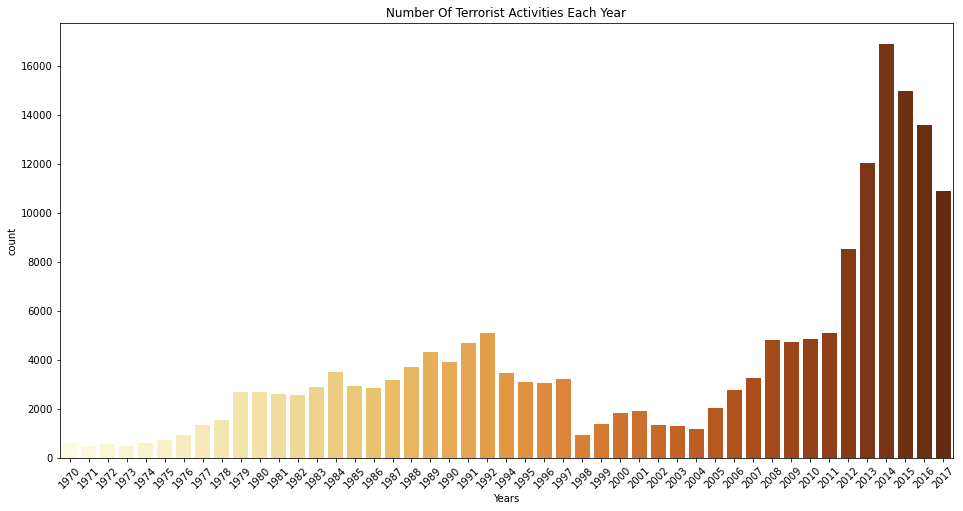

In [12]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Year',data=df,palette='YlOrBr')
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.xlabel('Years')
plt.show()

The graph shows Terrorist attacks from 1970 to 2017.It can be observed that the most number of terrorist 
attacks are held in 2014,followed by 2015 and 2016.It can also be infered that after 2012,there are relatively 
high terrorist activities as compared to graph from 1970 to 2011.

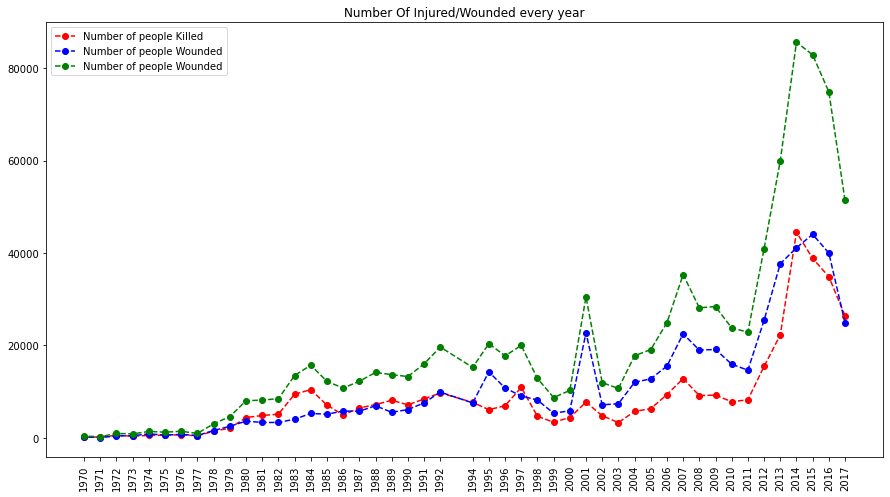

In [34]:
table_0 = df[['Year','Killed','Wounded']]
table_0 = table_0.groupby('Year',as_index = False).sum().sort_values(by='Year', ascending=False)
table_0['Affected']=table_0['Killed']+table_0['Wounded']

plt.subplots(figsize=(15,8))
plt.plot(table_0['Year'],table_0['Killed'],'r--o',label="Number of people Killed")
plt.plot(table_0['Year'],table_0['Wounded'],'b--o',label="Number of people Wounded")
plt.plot(table_0['Year'],table_0['Affected'],'g--o',label="Number of people Affected")
plt.xticks(table_0['Year'],rotation=90)
plt.title('Number Of Injured/Wounded every year')
plt.legend()
plt.show()

The graph plots number of people killed(red),wounded(blue) and Affacted(killed+wounded) from 1970 till 2017. The plots were steadily increasing till 1992.From 1994 till 2014.there is a drop in graph with sudden elevation in 2001.from 2001,it can be conclude that People are more affacted then before with peok in 2014. 

#### Countries With Most Terrorism

In [14]:
df['Country'].value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

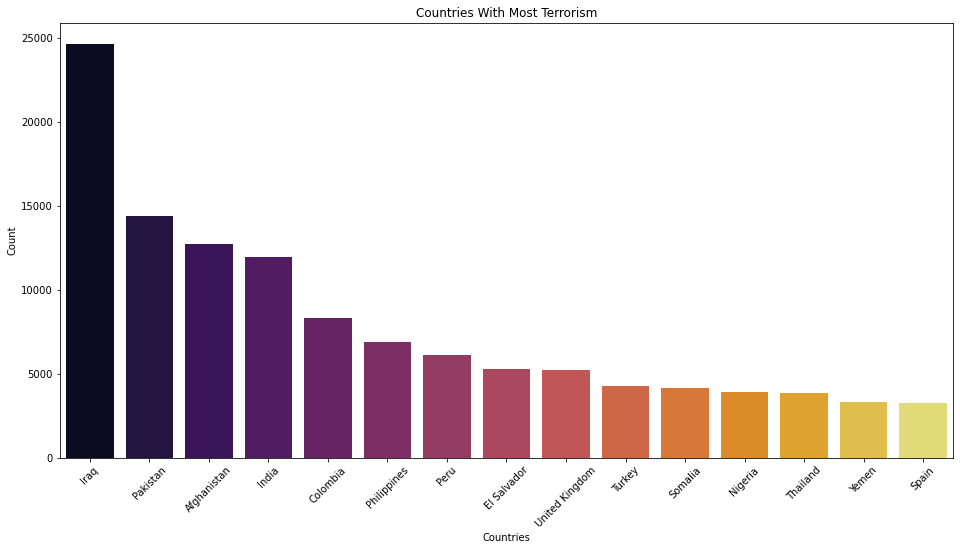

In [15]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts()[:15].index, palette='inferno')
plt.title('Countries With Most Terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Iraq is the most Affected country followed by pakistan,Afghanistan and India.

#### Cities With Most Terrorism

In [16]:
df['city'].value_counts()[1:15]

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

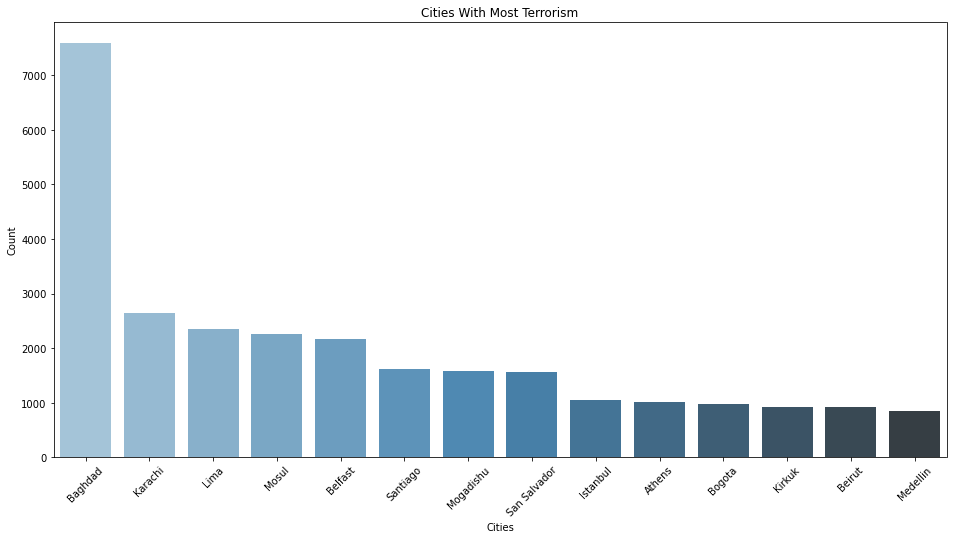

In [17]:
plt.subplots(figsize=(16,8))
sns.countplot(x='city', data=df, order=df['city'].value_counts()[1:15].index,palette='Blues_d')
plt.title('Cities With Most Terrorism')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Baghdad affects most from terrorism between 1970 to 2007.while karachi stands on second most city affected by terrorist.

#### Regions With Most Terrorist

In [18]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

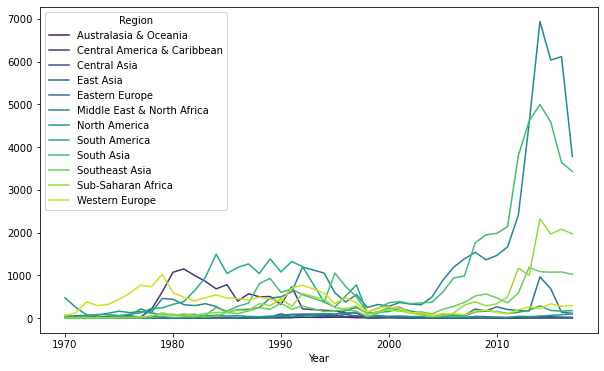

In [19]:
terror_region = pd.crosstab(df['Year'], df['Region'])
terror_region.plot(color=sns.color_palette('viridis', 12))
fig = plt.gcf()
fig.set_size_inches(10,6)


The graph shows the Terrorist activities over the year according to regions.It can be clearly infered that Middle ast and North America suffered most,followed by Sounth asia since 2000.

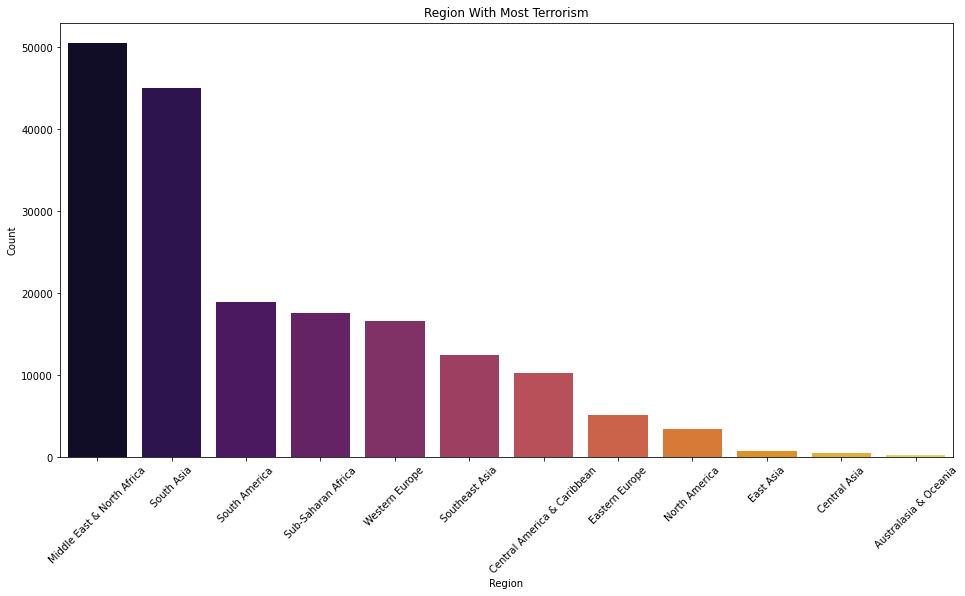

In [36]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().index,palette='inferno')
plt.title('Region With Most Terrorism')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Here,I have plot the rehions with the number of terrorist activities from 1970 to 2007

#### State With Most Terrorism

In [21]:
df['state'].value_counts()[:15]

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: state, dtype: int64

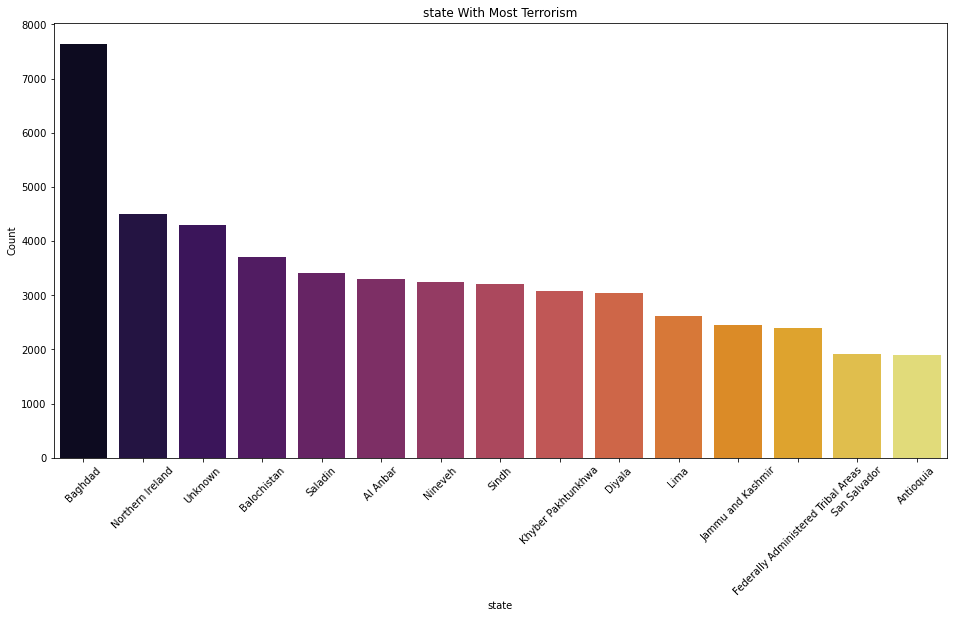

In [22]:
plt.subplots(figsize=(16,8))
sns.countplot(x='state', data=df, order=df['state'].value_counts()[:15].index,palette='inferno')
plt.title('state With Most Terrorism')
plt.xlabel('state')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Baghdad is Hot zone for terrorism 7645 terrorist acctacks followed by North Ireland with 4498 attacks from 1970 to 2007

#### Type of Attack

In [23]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

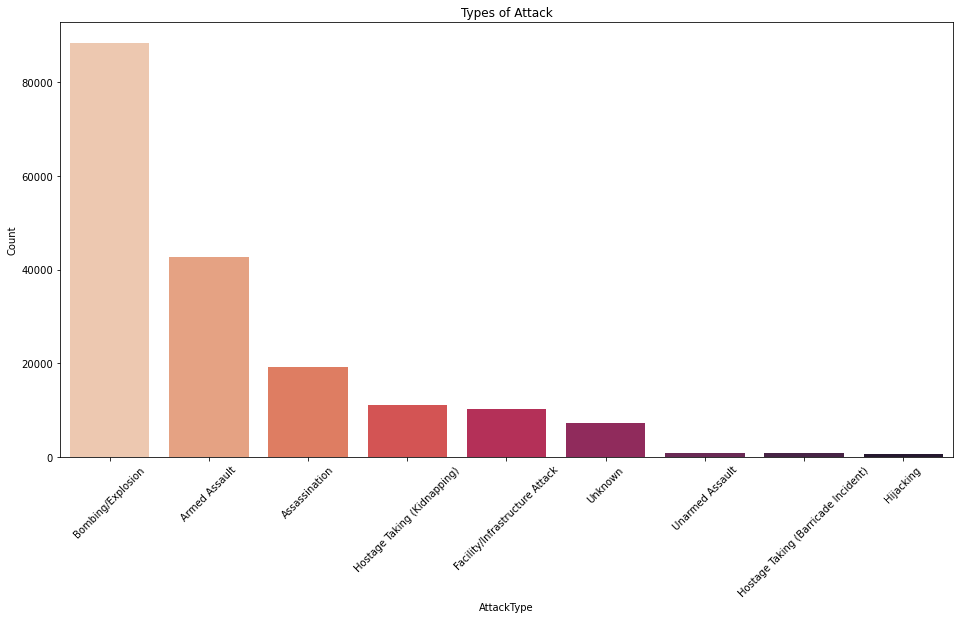

In [24]:
plt.subplots(figsize=(16,8))
sns.countplot(x='AttackType', data=df, order=df['AttackType'].value_counts()[:15].index,palette='rocket_r')
plt.title('Types of Attack')
plt.xlabel('AttackType')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

obming and Armed Assulats are the most common attacks type foloowed by Assasinations.

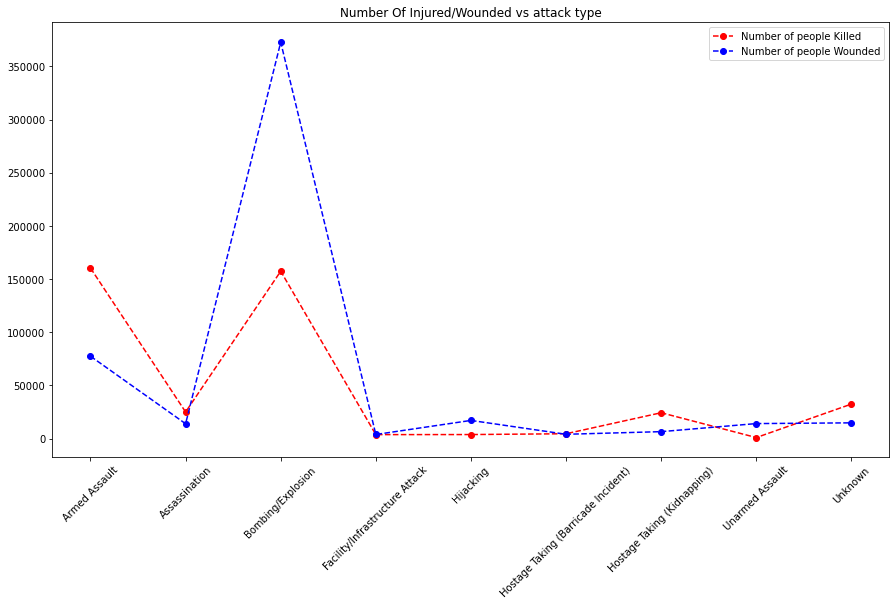

In [25]:
table_1 = df[['AttackType','Killed','Wounded']].groupby('AttackType',as_index = False).sum()
table_1 = table_1.reset_index()
plt.subplots(figsize=(15,8))
plt.plot(table_1['AttackType'],table_1['Killed'],'r--o',label="Number of people Killed")
plt.plot(table_1['AttackType'],table_1['Wounded'],'b--o',label="Number of people Wounded")
plt.xticks(rotation=45)
plt.title('Number Of Injured/Wounded vs attack type')
plt.legend()
plt.show()

The most dealeast type of attacks are Bombing/Explosion and Armed Assualt. 

#### Target Type

In [26]:
df['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

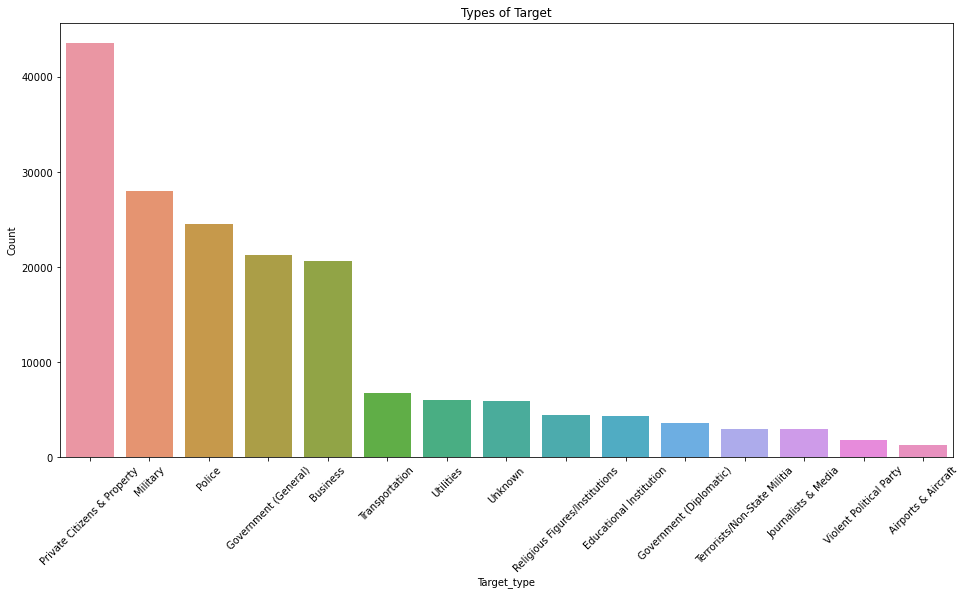

In [27]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Target_type', data=df, order=df['Target_type'].value_counts()[:15].index)
plt.title('Types of Target')
plt.xlabel('Target_type')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

The attack was mostly targed for private citizens folloed by Armed foces including military and police.

#### Types of Weapon used

In [28]:
df['Weapon_type'].value_counts()[:5]

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

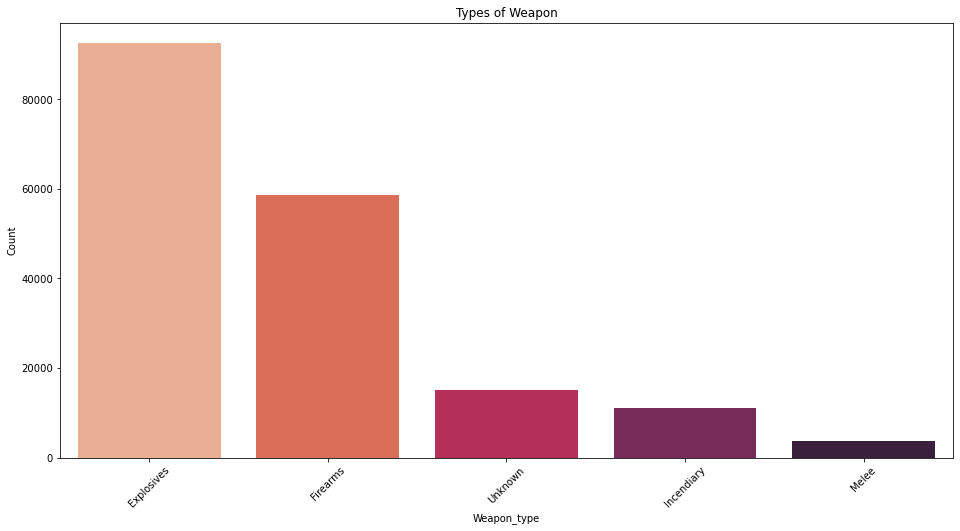

In [29]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Weapon_type', data=df, order=df['Weapon_type'].value_counts()[:5].index,palette='rocket_r')
plt.title('Types of Weapon')
plt.xlabel('Weapon_type')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Explosive and Firearms are the most coomon type of weapons used in terrorist attacks.

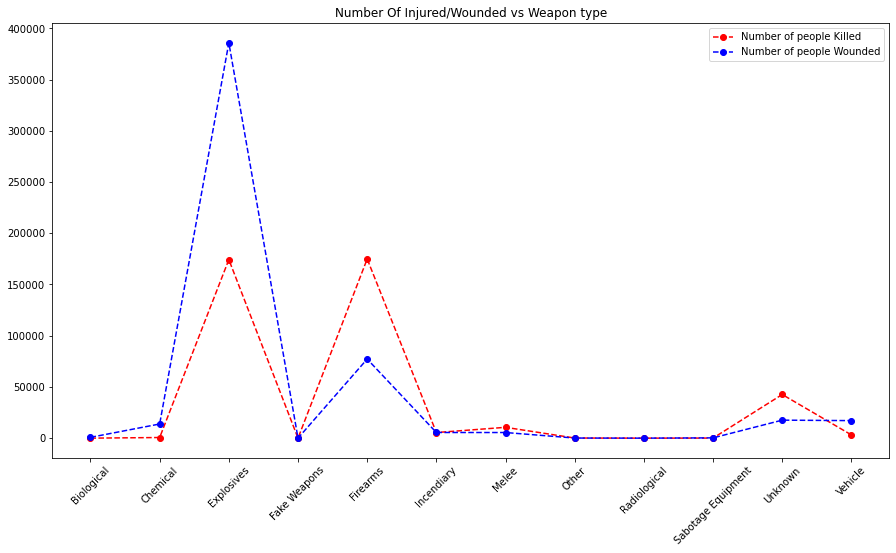

In [30]:
table_2 = df[['Weapon_type','Killed','Wounded']].groupby('Weapon_type',as_index = False).sum()
table_2 = table_2.reset_index()
plt.subplots(figsize=(15,8))
plt.plot(table_2['Weapon_type'],table_2['Killed'],'r--o',label="Number of people Killed")
plt.plot(table_2['Weapon_type'],table_2['Wounded'],'b--o',label="Number of people Wounded")
plt.xticks(rotation=45)
plt.title('Number Of Injured/Wounded vs Weapon type')
plt.legend()
plt.show()

#### Active Terrorist Groups

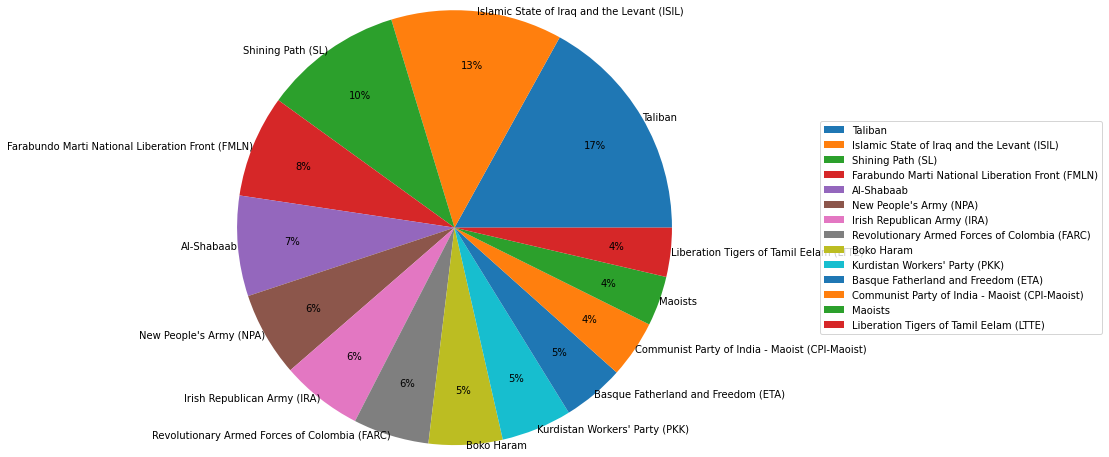

In [31]:
plt.figsize=(20,20)
label=df['Group'].value_counts()[1:15].index
plt.pie(df['Group'].value_counts()[1:15].values,radius=2.5,autopct='%1.0f%%',labels=label,pctdistance=0.75, labeldistance=1.)
plt.legend(label, loc='right', bbox_to_anchor=(3, 0, 0.5, 1))
plt.show()

Around 40% of terrorist activities are claimed by Taliban,ISIL and Sl groups

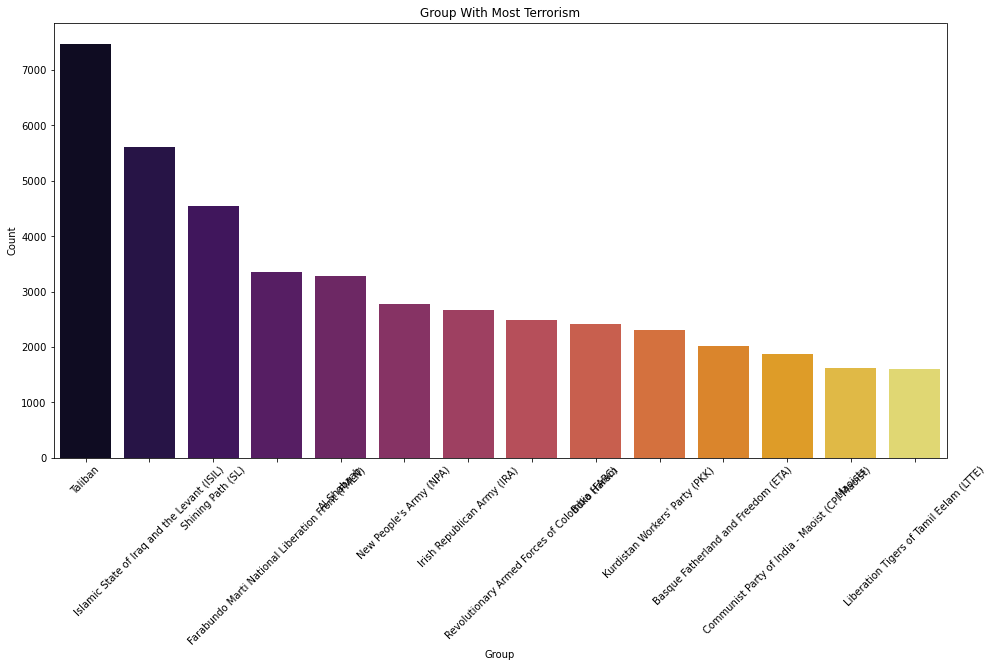

In [32]:
plt.subplots(figsize=(16,8))
sns.countplot(x='Group', data=df, order=df['Group'].value_counts()[1:15].index,palette='inferno')
plt.title('Group With Most Terrorism')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

Taliban is the most active terrorist group with over 7000 atacks followed by ISIL and SL.

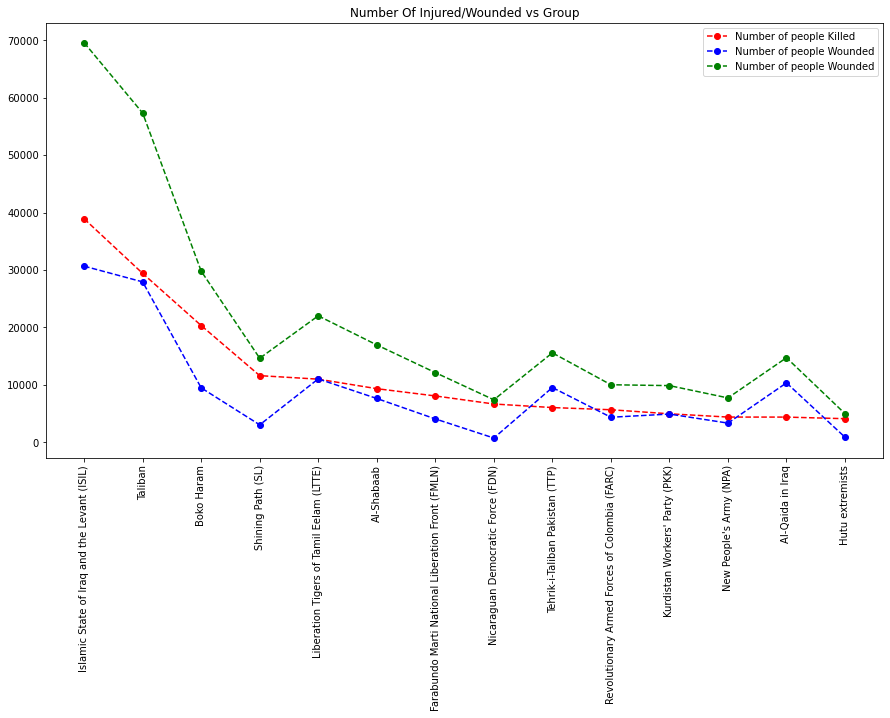

In [33]:
table_3 = df[['Group','Killed','Wounded']]
table_3 = table_3.groupby('Group',as_index = False).sum().reset_index().sort_values(by='Killed', ascending=False)
table_3["Affected"]=table_3["Killed"] +table_3["Wounded"]
table_3=table_3[1:15]
table_3
plt.subplots(figsize=(15,8))
plt.plot(table_3['Group'],table_3['Killed'],'r--o',label="Number of people Killed")
plt.plot(table_3['Group'],table_3['Wounded'],'b--o',label="Number of people Wounded")
plt.plot(table_3['Group'],table_3['Affected'],'g--o',label="Number of people Wounded")
plt.xticks(rotation=90)
plt.title('Number Of Injured/Wounded vs Group')
plt.legend()
plt.show()

It can be deduces that ISIL was the leading group that killed/wounded most number of people followed by Taliban and Boko HAram